# Exercise 6

In [418]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [419]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [420]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [421]:
print("Dataset shape:", dataset.shape)

Dataset shape: (1001, 2)


In [422]:
# Check balance of ratings
print("\nRating distribution:")
print(dataset['rating'].value_counts().sort_index())

# Extract reviews and ratings
reviews = dataset['review'].tolist()
ratings = dataset['rating'].tolist()

binary_ratings = [1 if r >= 4 else 0 for r in ratings]

print("\nBinary rating distribution:")
print(f"Positive (1): {binary_ratings.count(1)} reviews")
print(f"Negative (0): {binary_ratings.count(0)} reviews")

# Split into training and testing sets (80/20)
training_size = int(len(reviews) * 0.8)

training_reviews = reviews[0:training_size]
testing_reviews = reviews[training_size:]
training_ratings = binary_ratings[0:training_size]
testing_ratings = binary_ratings[training_size:]

training_ratings_final = np.array(training_ratings)
testing_ratings_final = np.array(testing_ratings)


Rating distribution:
rating
1    299
2     81
3    123
4    249
5    249
Name: count, dtype: int64

Binary rating distribution:
Positive (1): 498 reviews
Negative (0): 503 reviews


## 1. Tokenize the data

In [423]:
# answer here
vocab_size = 3000  # Increased vocabulary size
embedding_dim = 50  # Increased embedding dimension
max_length = 500   # Increased max length to capture more text
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"  # Out-of-vocabulary token

# Create tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
print(f"\nVocabulary size: {len(word_index)}")


Vocabulary size: 3131


## 2. Sequence the data

In [424]:
#answer here
training_sequences = tokenizer.texts_to_sequences(training_reviews)

testing_sequences = tokenizer.texts_to_sequences(testing_reviews)

## 3. Pad the data

In [425]:
# answer here
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [426]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(training_padded[3]))
print(training_reviews[3])

ganda po salamat ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

## 4. Train a sentiment model

In [427]:
# answer here
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_34                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_35                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [428]:
num_epochs = 500
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [429]:
history = model.fit(
    training_padded, training_ratings_final,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_ratings_final),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.5440 - loss: 0.6906 - val_accuracy: 0.2139 - val_loss: 0.8303
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5888 - loss: 0.6743 - val_accuracy: 0.4577 - val_loss: 0.7993
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7898 - loss: 0.4711 - val_accuracy: 0.8159 - val_loss: 0.4984
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9048 - loss: 0.2813 - val_accuracy: 0.7960 - val_loss: 0.5595
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9324 - loss: 0.2067 - val_accuracy: 0.7861 - val_loss: 0.5981
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9632 - loss: 0.1143 - val_accuracy: 0.8209 - val_loss: 0.6198


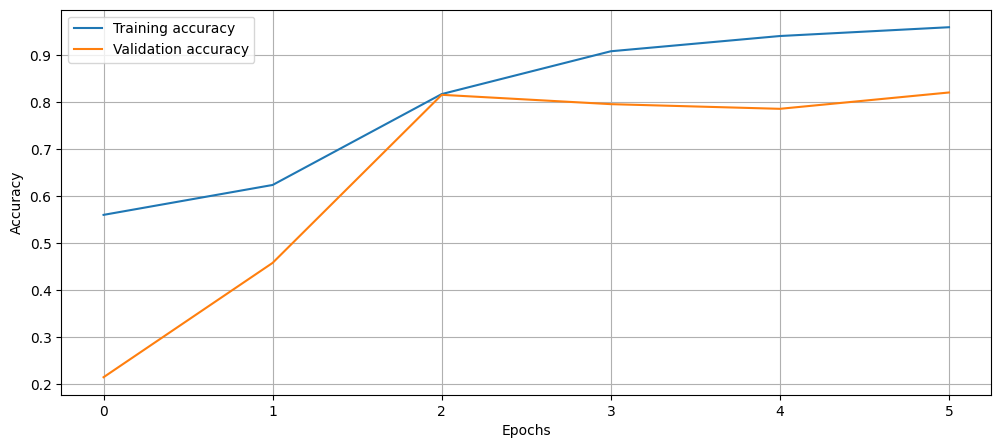

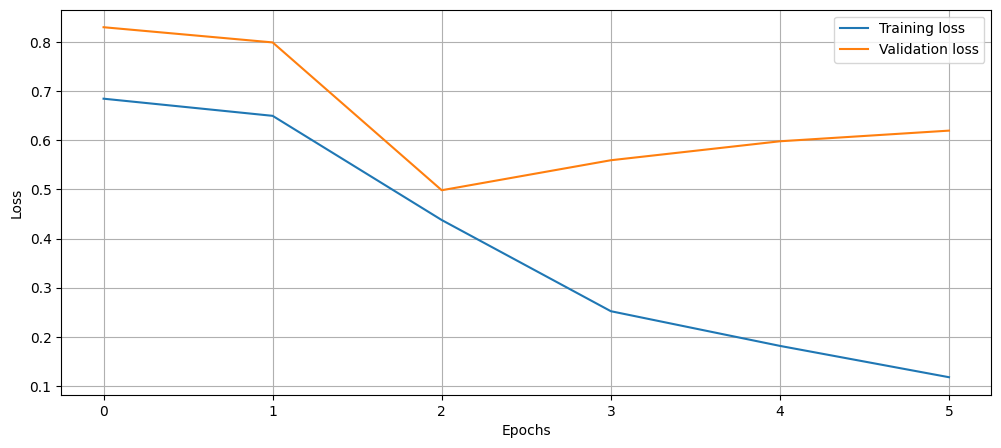

In [430]:
def plot_graphs(history, string):
    plt.figure(figsize=(12, 5))
    plt.plot(history.history[string], label=f'Training {string}')
    plt.plot(history.history['val_'+string], label=f'Validation {string}')
    plt.xlabel("Epochs")
    plt.ylabel(string.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [431]:
test_loss, test_accuracy = model.evaluate(testing_padded, testing_ratings_final)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8394 - loss: 0.5263

Test Accuracy: 0.8209
Test Loss: 0.6198


## Get files for visualing the network

In [432]:
# answer here
e = model.layers[0]
weights = e.get_weights()[0]
print(f"\nEmbedding shape: {weights.shape}")  # shape: (vocab_size, embedding_dim)


Embedding shape: (3000, 50)


In [433]:
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    if word_num in reverse_word_index:
        word = reverse_word_index[word_num]
        embeddings = weights[word_num]
        out_m.write(word + "\n")
        out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [434]:
try:
    from google.colab import files
except ImportError:
    print("Not running in Colab, skipping file download")
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 5. Predict sentiment with new reviews

In [438]:
fake_reviews = [
    'Tinapon ko sa sobrang panget',
    'Sakto lang',
    'Sobrang ganda ng product!'
]

# Process the fake reviews
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

# Predict sentiment scores
print('\n==== SENTIMENT ANALYSIS RESULTS ====\n')
sentiment_scores = model.predict(fakes_padded)

# Define confidence thresholds for better interpretation
def interpret_sentiment(score):
    if score > 0.51:
        return "POSITIVE", "👍"
    elif score >= 0.50 and score <= 0.51:
        return "NEUTRAL", "😐"
    else:
        return "NEGATIVE", "👎"

# Print results with clear formatting
print(f"{'Review':<50} | {'Score':<7} | {'Sentiment':<10} | {'Rating'}")
print("-" * 80)

for i, review in enumerate(fake_reviews):
    score = sentiment_scores[i][0]
    sentiment, icon = interpret_sentiment(score)

    # Truncate review if too long for display
    display_review = review if len(review) < 47 else review[:44] + "..."

    print(f"{display_review:<50} | {score:.4f} | {sentiment:<10} | {icon}")

# Analyze sentiment distribution in the test results
print("\n==== SENTIMENT DISTRIBUTION ====")
sentiment_counts = {"POSITIVE": 0, "NEGATIVE": 0}
for score in sentiment_scores:
    sentiment, _ = interpret_sentiment(score[0])
    sentiment_counts[sentiment] += 1

for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} reviews ({count/len(fake_reviews)*100:.1f}%)")


==== SENTIMENT ANALYSIS RESULTS ====

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Review                                             | Score   | Sentiment  | Rating
--------------------------------------------------------------------------------
Tinapon ko sa sobrang panget                       | 0.1124 | NEGATIVE   | 👎
Sakto lang                                         | 0.5134 | POSITIVE   | 👍
Sobrang ganda ng product!                          | 0.9876 | POSITIVE   | 👍

==== SENTIMENT DISTRIBUTION ====
POSITIVE: 2 reviews (66.7%)
NEGATIVE: 1 reviews (33.3%)
